# Hello QISKIT!

In [3]:

import qiskit 


print(qiskit.__version__)



2.3.0


## First Circuit

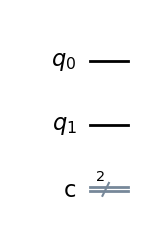

In [4]:
circuit = qiskit.QuantumCircuit(2,2) #Create a Quantum Circuit with 2 qubits and 2 classical bits
circuit.draw("mpl")

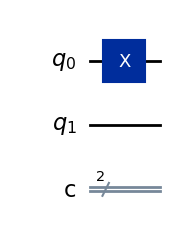

In [5]:
circuit.x(0) #Apply X (not) gate to qubit 0
circuit.draw("mpl")

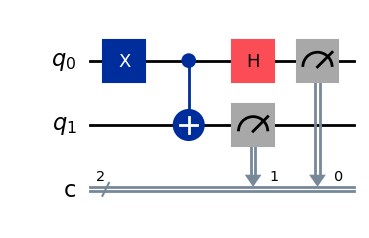

In [6]:
circuit.cx(0,1) #Apply CNOT gate with control qubit 0 and target qubit 1 #Flips 2nd qubit value if first qubit is 1
circuit.h(0) #Apply Hadamard gate to qubit 0
circuit.measure([0,1],[0,1]) #Measure qubits 0 and 1 into classical bits 0 and 1
circuit.draw("mpl")

## Hello AER and Circuit Simulations

In [7]:
import qiskit_aer
print(qiskit_aer.__version__)


0.17.2


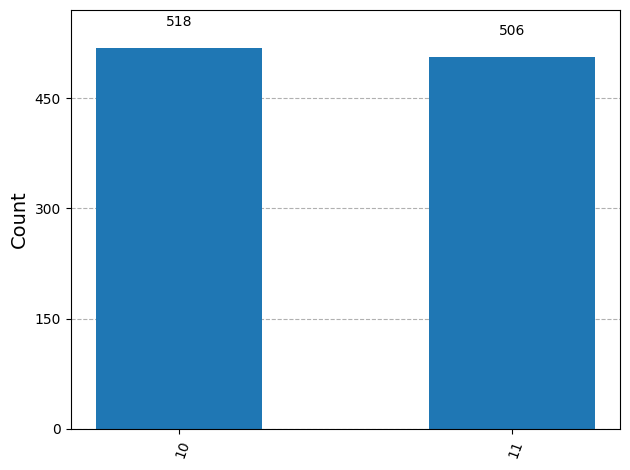

In [8]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()

transpiled_circuit = qiskit.transpile(circuit, simulator) #Transpile the circuit for the simulator
job = simulator.run(transpiled_circuit, shots=1024) #Run the circuit on the simulator for 1024 shots
result = job.result() #Get the results from the job
counts = result.get_counts(circuit) #Get the counts (measurement results)

from qiskit.visualization import plot_histogram
plot_histogram(counts) #Visualize the results as a histogram


## State-vectors 

Initial statevector: [1.+0.j 0.+0.j]


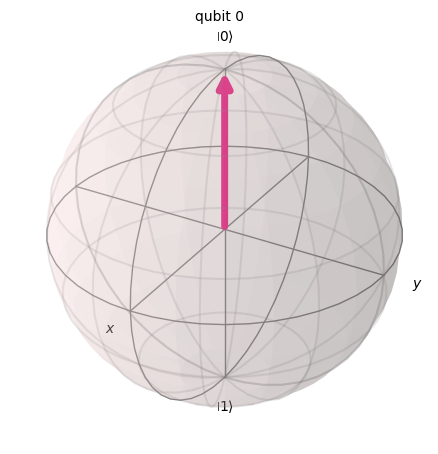

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

circuit = qiskit.QuantumCircuit(1) #Create a Quantum Circuit with 1 qubit 

state0 = Statevector.from_instruction(circuit) #Get the initial statevector before hadamard gate
print("Initial statevector:", state0.data)
plot_bloch_multivector(state0) #Visualize the initial state on the Bloch sphere



Statevector after Hadamard gate: [0.70710678+0.j 0.70710678+0.j]


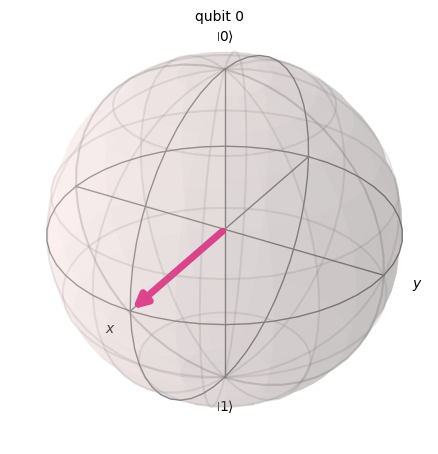

In [10]:

circuit.h(0) #Apply Hadamard gate to qubit 0
state1 = Statevector.from_instruction(circuit) #Get the statevector after hadamard gate
print("Statevector after Hadamard gate:", state1.data)

plot_bloch_multivector(state1) #Visualize the state on the Bloch sphere;

### Create entanglement

Entangled statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


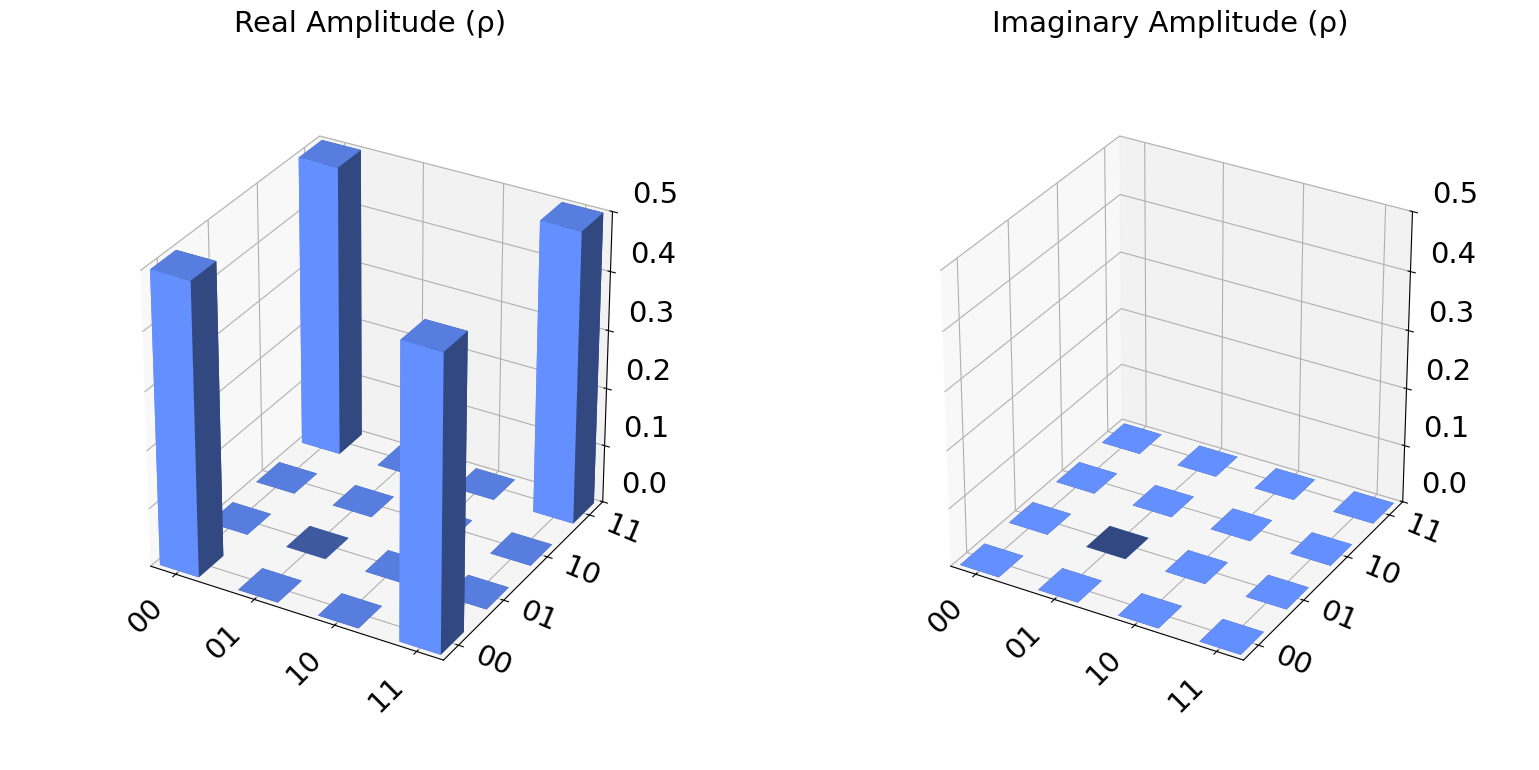

In [11]:
from qiskit.visualization import plot_state_city

circuit = qiskit.QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
state = Statevector.from_instruction(circuit)
print("Entangled statevector:", state.data)

plot_state_city(state) #Visualize the entangled state in a cityscape representation

### More gates

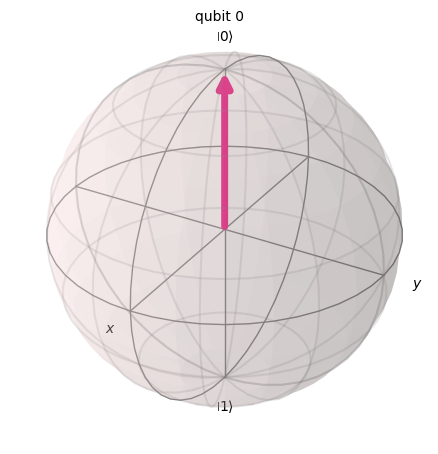

In [12]:
circuit = qiskit.QuantumCircuit(1)
state0 = Statevector.from_instruction(circuit)
plot_bloch_multivector(state0)

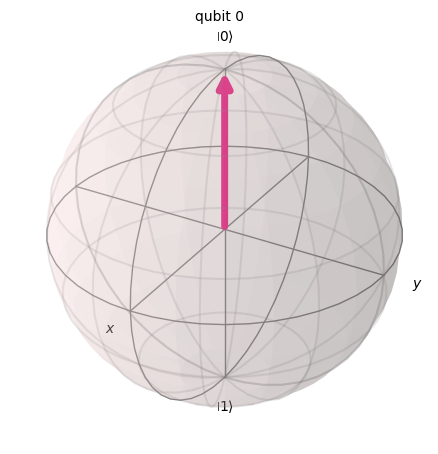

In [13]:
circuit.z(0)
state3 = Statevector.from_instruction(circuit)
plot_bloch_multivector(state3)  

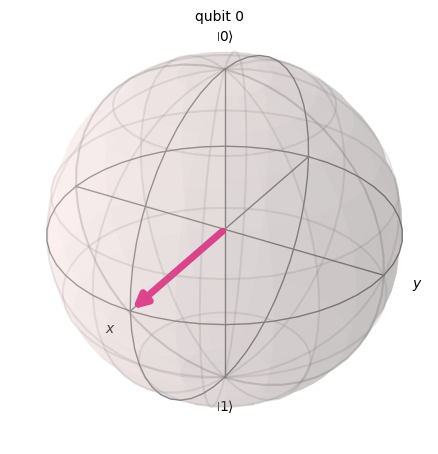

In [14]:
circuit.h(0)
state1 = Statevector.from_instruction(circuit)
plot_bloch_multivector(state1)

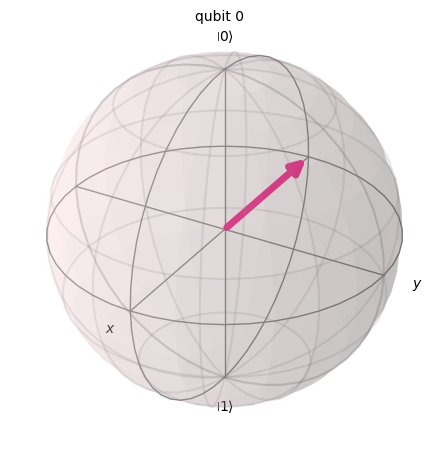

In [15]:
circuit.y(0)
state2 = Statevector.from_instruction(circuit)
plot_bloch_multivector(state2)

## Quantum Registers


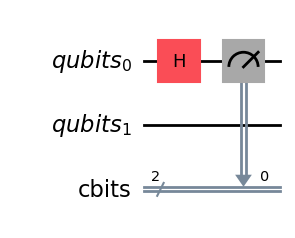

In [16]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'qubits')  # Quantum register with 2 qubits
cr = ClassicalRegister(2, 'cbits')  # Classical register with 2 bits

circuit = qiskit.QuantumCircuit(qr, cr)  # Create a Quantum Circuit with the registers
circuit.h(qr[0])
circuit.measure(qr[0], cr[0]) #Map qubit 0 to classical bit 0
circuit.draw("mpl")

## Rotation


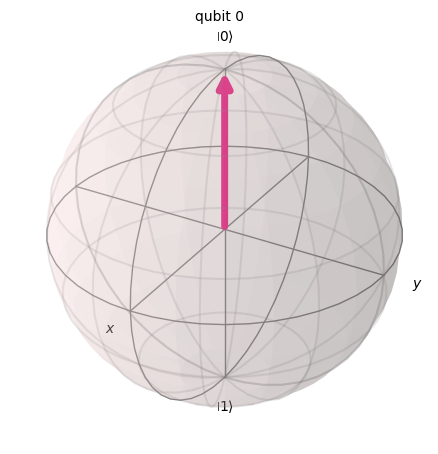

In [29]:
import numpy as np

q = QuantumRegister(1, 'qubit')
c = ClassicalRegister(1, 'cbit')

circuit = qiskit.QuantumCircuit(q,c)
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state0)

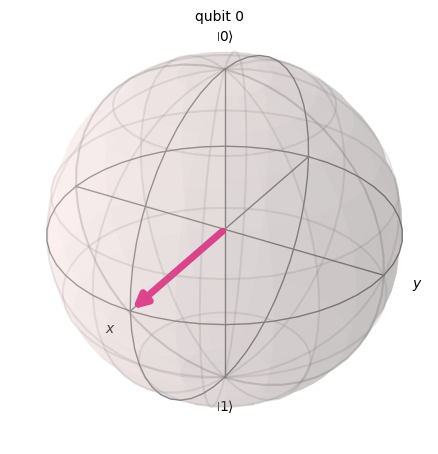

In [30]:
circuit.ry(np.pi/2, q[0])
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state1)

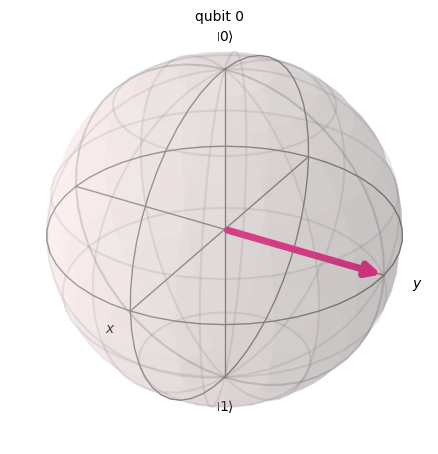

In [32]:
circuit.rz(np.pi/2, q[0])
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state)

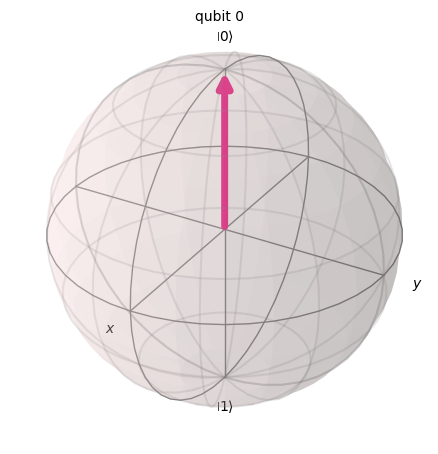

In [33]:
circuit.rx(np.pi/2, q[0])
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state)